# Introduction to Dynamic Programming 3

In [ ]:
# init

# Problem: 63. Unique Paths II

## Difficulty: Medium  


---

### Problem Description:
You are given an `m x n` integer array `grid`. A robot is initially located at the top-left corner (`grid[0][0]`). The robot tries to move to the bottom-right corner (`grid[m-1][n-1]`). The robot can only move either **down** or **right** at any point in time.

An **obstacle** and **space** are marked as `1` and `0` respectively in `grid`. A path that the robot takes **cannot include any square that is an obstacle**.

Return the **number of possible unique paths** that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to 2 * 10^9.

---

### Examples:

#### Example 1:

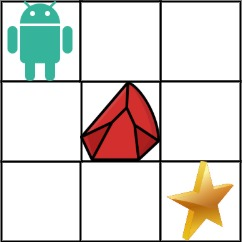

**Input**:
```plaintext
obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
```

**Output**:
```plaintext
2
```

**Explanation**:
There is one obstacle in the middle of the 3x3 grid above.  
There are two ways to reach the bottom-right corner:
1. Right → Right → Down → Down
2. Down → Down → Right → Right

---

#### Example 2:

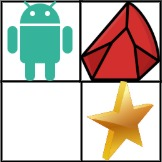

**Input**:
```plaintext
obstacleGrid = [[0,1],[0,0]]
```

**Output**:
```plaintext
1
```

---

### Constraints:
- m == obstacleGrid.length
- n == obstacleGrid[i].length
- 1 <= m, n <= 100
- obstacleGrid[i][j] is 0 or 1.

---

### Hint:
Use **dynamic programming** to calculate the number of unique paths, keeping track of obstacles in the grid.


In [ ]:
# 0 ms
class Solution(object):
    def uniquePathsWithObstacles(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        if not grid or grid[0][0] == 1:
            return 0  # No paths if grid is empty or starting point is an obstacle
        
        m = len(grid)
        n = len(grid[0])
        
        # Create a DP table
        dp = [[0] * n for _ in range(m)]
        
        # Initialize the starting point
        dp[0][0] = 1
        
        # Fill the first row
        for j in range(1, n):
            dp[0][j] = dp[0][j-1] if grid[0][j] == 0 else 0
        
        # Fill the first column
        for i in range(1, m):
            dp[i][0] = dp[i-1][0] if grid[i][0] == 0 else 0
        
        # Fill the rest of the DP table
        for i in range(1, m):
            for j in range(1, n):
                if grid[i][j] == 0:  # Only calculate if not an obstacle
                    dp[i][j] = dp[i-1][j] + dp[i][j-1]
        
        # The bottom-right corner will have the result
        return dp[m-1][n-1]

In [ ]:
class Solution(object):
    def uniquePathsWithObstacles(self, obstacleGrid):
        """
        :type obstacleGrid: List[List[int]]
        :rtype: int
        """
        m, n = len(obstacleGrid), len(obstacleGrid[0])
    
        if obstacleGrid[0][0] == 1 or obstacleGrid[m-1][n-1] == 1:
            return 0
        
        obstacleGrid[0][0] = 1
        
        for j in range(1, n):
            obstacleGrid[0][j] = 1 if obstacleGrid[0][j] == 0 and obstacleGrid[0][j-1] == 1 else 0
        
        for i in range(1, m):
            obstacleGrid[i][0] = 1 if obstacleGrid[i][0] == 0 and obstacleGrid[i-1][0] == 1 else 0
        
        for i in range(1, m):
            for j in range(1, n):
                if obstacleGrid[i][j] == 0:
                    obstacleGrid[i][j] = obstacleGrid[i-1][j] + obstacleGrid[i][j-1]
                else:
                    obstacleGrid[i][j] = 0
        return obstacleGrid[m-1][n-1]

# 120. Triangle

#### Difficulty: Medium

---

### Problem Description

Given a triangle array, return the minimum path sum from top to bottom.

For each step, you may move to an adjacent number of the row below. More formally, if you are on index `i` on the current row, you may move to either index `i` or `i + 1` on the next row.

---

### Examples

#### Example 1:
**Input**: 
```
triangle = [[2], [3, 4], [6, 5, 7], [4, 1, 8, 3]]
```

**Output**: 
```
11
```

**Explanation**: 
The triangle looks like:
```
   2
  3 4
 6 5 7
4 1 8 3
```

The minimum path sum from top to bottom is `2 + 3 + 5 + 1 = 11`.

---

#### Example 2:
**Input**: 
```
triangle = [[-10]]
```

**Output**: 
```
-10
```

---

### Constraints
- 1 <= triangle.length <= 200
- triangle[0].length == 1
- triangle[i].length == triangle[i - 1].length + 1
- -10^4 <= triangle[i][j] <= 10^4

---

### Follow-Up
Can you solve this problem using only O(n) extra space, where n is the total number of rows in the triangle?


In [ ]:
# test case 
# [[2],[3,4],[6,5,7],[4,1,8,3]]
# [[-10]]

In [ ]:
# time complexity O(n^2)
# Space Complexity O(1)

In [ ]:
# 4 ms
class Solution(object):
    def minimumTotal(self, triangle):
        """
        :type triangle: List[List[int]]
        :rtype: int
        """
        # Start from the second-to-last row and move upwards
        for row in range(len(triangle) - 2, -1, -1):
            for col in range(len(triangle[row])):
                # Update the current element with the minimum path sum
                triangle[row][col] += min(triangle[row + 1][col], triangle[row + 1][col + 1])
        
        # Return the minimum path sum at the top
        return triangle[0][0]

In [ ]:
# 1 ms
class Solution(object):
    def minimumTotal(self, triangle):
        """
        :type triangle: List[List[int]]
        :rtype: int
        """
        # Initialize a DP array with the last row of the triangle
        dp = triangle[-1][:]
        
        # Start from the second-to-last row and move upwards
        for row in range(len(triangle) - 2, -1, -1):
            for col in range(len(triangle[row])):
                # Update DP array for the current cell
                dp[col] = triangle[row][col] + min(dp[col], dp[col + 1])
        
        # The first element of DP now contains the minimum path sum
        return dp[0]

# 931. Minimum Falling Path Sum

#### Difficulty: Medium

### Problem Statement
Given an n x n array of integers `matrix`, return the minimum sum of any falling path through the matrix.

A falling path starts at any element in the first row and chooses the element in the next row that is either directly below or diagonally left/right. Specifically, the next element from position `(row, col)` will be `(row + 1, col - 1)`, `(row + 1, col)`, or `(row + 1, col + 1)`.

- Matrix manipulation
- Dynamic programming
---

### Examples

#### Example 1:

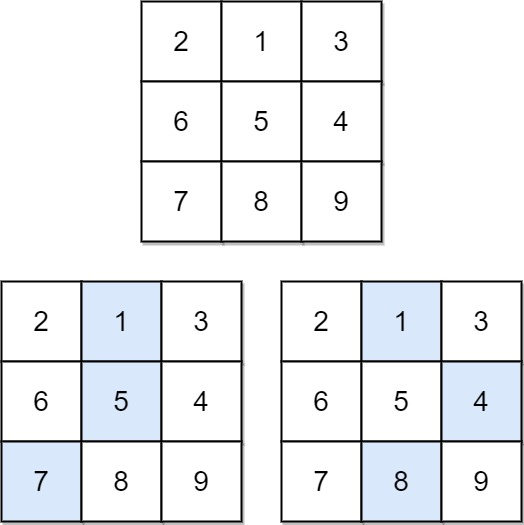

```plaintext
Input: matrix = [[2,1,3],[6,5,4],[7,8,9]]
Output: 13
Explanation: There are two falling paths with a minimum sum as shown:
2 → 1 → 5 and 2 → 3 → 4.
The minimum sum is 13.
```

#### Example 2:

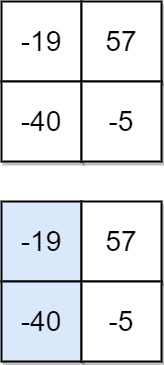

```plaintext
Input: matrix = [[-19,57],[-40,-5]]
Output: -59
Explanation: The falling path with a minimum sum is shown:
-19 → -40.
The minimum sum is -59.
```

---

### Constraints
- n == matrix.length == matrix[i].length
- 1 <= n <= 100
- -100 <= matrix[i][j] <= 100

--- 

In [ ]:
# 19 ms
class Solution(object):
    def minFallingPathSum(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: int
        """
        for row in range(len(matrix) - 2, -1, -1):  # Start from the second-to-last row
            for col in range(len(matrix[row])):
                min_path_sum = matrix[row + 1][col]  # directly below
                
                if col > 0:
                    min_path_sum = min(min_path_sum, matrix[row + 1][col - 1]) # Check diagonally left
                
                if col < len(matrix[row]) - 1:
                    min_path_sum = min(min_path_sum, matrix[row + 1][col + 1]) # Check diagonally right
                matrix[row][col] += min_path_sum
        return min(matrix[0])


In [ ]:
# 9 ms
class Solution(object):
    def minFallingPathSum(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: int
        """
        n = len(matrix)
        # dp = [[-1 for _ in range(n)] for _ in range(n)]


        # dp[0] = matrix[0]
        for i in range(1, n):
            for j in range(n):
                up = matrix[i][j] + matrix[i-1][j]
                ld = matrix[i][j]
                if j>0:
                    ld += matrix[i-1][j-1]
                else:
                    ld += float('inf')
                rd = matrix[i][j]
                if j<n-1:
                    rd += matrix[i-1][j+1]
                else:
                    rd += float('inf')
                matrix[i][j] = min(up, min(ld, rd))
        return min(matrix[n-1])

